In [152]:
#T1(a)1、2

## Data Cleaning & Handling inconsistencies ##

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from itertools import combinations
import seaborn as sns


In [154]:
# data acquistion
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data"
column_names = [f'feature_{i}' for i in range(127)]  # the data don't support the column name
df = pd.read_csv(url, names=column_names, na_values='?', skiprows=1)
df_original = df

In [155]:
df.head()


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126
53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.0,NaN,0.67
24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.0,NaN,0.43
34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.0,NaN,0.12
42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.0,NaN,0.03
6,NaN,NaN,SouthPasadenacity,1,0.02,0.28,0.06,0.54,1.00,0.25,...,0.01,0.58,0.10,NaN,NaN,NaN,NaN,0.0,NaN,0.14


In [156]:
print(df.dtypes)#check  each  feature's  type

feature_0      float64
feature_1      float64
feature_2       object
feature_3        int64
feature_4      float64
                ...   
feature_122    float64
feature_123    float64
feature_124    float64
feature_125    float64
feature_126    float64
Length: 127, dtype: object


In [157]:
(df.dtypes).value_counts()#how  many  types  do  we  have

float64    125
object       1
int64        1
Name: count, dtype: int64

In [158]:
df.select_dtypes(include=['object']).columns#only  feature_2  is  object

Index(['feature_2'], dtype='object')

In [159]:
df.isnull().sum()#the  number  of  Nan

feature_0      1173
feature_1      1176
feature_2         0
feature_3         0
feature_4         0
               ... 
feature_122    1675
feature_123    1675
feature_124       0
feature_125    1675
feature_126       0
Length: 127, dtype: int64

In [160]:
#From  the  'Additional Variable Information'(in  the  website)
"""
 -- Feature_0  state: US state (by number) - not counted as predictive above, but if considered, should be consided nominal (nominal) 
  --Feature_1  county: numeric code for county - not predictive, and many missing values (numeric)
  --Feature_2  community: numeric code for community - not predictive and many missing values (numeric)
  --Feature_3  communityname: community name - not predictive - for information only (string)
  --Feature_4  fold: fold number for non-random 10 fold cross validation, potentially useful for debugging, paired tests - not predictive (numeric)
"""
# we  use  KNN  to  get  the  value  to  replace  the  Nan  value
from sklearn.impute import KNNImputer
import pandas as pd

features_to_impute_knn = ['feature_0', 'feature_1', 'feature_3', 'feature_4']

imputer = KNNImputer(n_neighbors=5)

df[features_to_impute_knn] = imputer.fit_transform(df[features_to_impute_knn]).round(0).astype(int)


df

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126
53,65,44629,Tukwilacity,1,0,0.16,0.12,0.74,0.45,0.07,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
24,65,44629,Aberdeentown,1,0,0.42,0.49,0.56,0.17,0.04,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
34,5,81440,Willingborotownship,1,0,0.77,1.00,0.08,0.12,0.10,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
42,95,6096,Bethlehemtownship,1,0,0.55,0.02,0.95,0.09,0.05,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
6,13,56386,SouthPasadenacity,1,0,0.28,0.06,0.54,1.00,0.25,...,0.01,0.58,0.10,NaN,NaN,NaN,NaN,0.00,NaN,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,27,52335,TempleTerracecity,10,0,0.40,0.10,0.87,0.12,0.16,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
6,156,48266,Seasidecity,10,0,0.96,0.46,0.28,0.83,0.32,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
9,9,80070,Waterburytown,10,0,0.37,0.25,0.69,0.04,0.25,...,0.08,0.32,0.18,0.08,0.06,0.78,0.0,0.91,0.28,0.23
25,17,72600,Walthamcity,10,0,0.51,0.06,0.87,0.22,0.10,...,0.03,0.38,0.33,0.02,0.02,0.79,0.0,0.22,0.18,0.19


In [161]:
features_to_impute_knn = ['feature_0', 'feature_1','feature_2', 'feature_3', 'feature_4']

features_to_impute_mean = [col for col in df.columns if col not in features_to_impute_knn]
df[features_to_impute_mean] = df[features_to_impute_mean].fillna(df[features_to_impute_mean].mean())
#for  other  features  we  use  its  average  to  replace  its  Nan  value
print(df.isnull().sum().sum())#check  how  many  value  do  we have  now

0


In [162]:
#we  want  to  analyse  the  relationship  between  features  and  ViolentCrimesPerPop(feature_126)

#if  you  are  interested  in  every  feature's  name  (https://archive.ics.uci.edu/dataset/183/communities+and+crime),  which  I  have  sent  in  our  message  group
y = df['feature_126'].values
X = df.drop(columns=['feature_126','feature_2']).values#drop  feature_126  and  feature_2(char)
X

array([[6.50000000e+01, 4.46290000e+04, 1.00000000e+00, ...,
        4.40251572e-01, 0.00000000e+00, 1.95251572e-01],
       [6.50000000e+01, 4.46290000e+04, 1.00000000e+00, ...,
        4.40251572e-01, 0.00000000e+00, 1.95251572e-01],
       [5.00000000e+00, 8.14400000e+04, 1.00000000e+00, ...,
        4.40251572e-01, 0.00000000e+00, 1.95251572e-01],
       ...,
       [9.00000000e+00, 8.00700000e+04, 1.00000000e+01, ...,
        0.00000000e+00, 9.10000000e-01, 2.80000000e-01],
       [1.70000000e+01, 7.26000000e+04, 1.00000000e+01, ...,
        0.00000000e+00, 2.20000000e-01, 1.80000000e-01],
       [3.40000000e+01, 5.86730000e+04, 1.00000000e+01, ...,
        5.00000000e-01, 1.00000000e+00, 1.30000000e-01]])

In [163]:
#we  have  too  many  features,  we  just  curious  about  the  features  have  the  strongest  relationship  features  


"""
the  below  methods  you  don't  need  to  know,  I  can  write  this  part  in  our  essay.  You  can  know  that  I  
use  some  methods  to  select  the  most  significant  features.
"""

"\nthe  below  methods  you  don't  need  to  know,  I  can  write  this  part  in  our  essay.  You  can  know  that  I  \nuse  some  methods  to  select  the  most  significant  features.\n"

In [164]:
scaler = StandardScaler()#creat the normalization
X_scaled = scaler.fit_transform(X)#normalize the X
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [165]:
X_train_const = sm.add_constant(X_train)  # add a constant, science statsmental's  OLS don't have the intercept
model = sm.OLS(y_train, X_train_const).fit()
p_values = model.pvalues[1:]  # delete the p-value of intercept
important_features_ols = np.argsort(p_values)[:10]  # select the most significant 10 features
print("OLS significant feature:", important_features_ols)


OLS significant feature: [ 0 31 71 42 69 77 14 24 51 78]


In [166]:
from math import comb

n_features = X_train.shape[1]
max_features = 3  # you can adjust this value

total_combinations = sum(comb(n_features, k) for k in range(1, max_features + 1))
print(f"⚠️ we need to calculate {total_combinations} set of model")

if total_combinations > 1e6:
    print(" too complex，recomment decrease max_features（recommend ≤3）")


⚠️ we need to calculate 325625 set of model


In [167]:
from itertools import combinations
import numpy as np
import statsmodels.api as sm
from tqdm import tqdm
from math import comb

def find_max_features(n_features, max_limit=1e6):

    for max_f in range(1, n_features + 1):
        total_combinations = sum(comb(n_features, k) for k in range(1, max_f + 1))
        if total_combinations > max_limit:
            return max_f - 1  # 返回不会超过 max_limit 的最大值
    return n_features

def best_subset(X, y, max_features=None, early_stop=0.99):

    n_features = X.shape[1]

    # select max_features
    if max_features is None:
        max_features = find_max_features(n_features)
        print(f" max_features = {max_features}")

    print(f"🔍 calculate Best Subset (choose {max_features} feature, feature size: {n_features})...")

    best_score = -np.inf
    best_subset = None

    
    for k in tqdm(range(1, max_features + 1), desc="Searching Best Subset"):
        for subset in combinations(range(n_features), k):
            X_subset = X[:, subset]
            model = sm.OLS(y, sm.add_constant(X_subset)).fit()

            # select the largest R²_adj 
            if model.rsquared_adj > best_score:
                best_score = model.rsquared_adj
                best_subset = subset

            # **early stop**：if R²_adj larger than early_stop，stop early
            if best_score > early_stop:
                print(f" find the model good enough (R²_adj = {best_score:.4f})，stop early")
                return best_subset

    print(f"Best Subset success！（the best feature number : {len(best_subset)}，R²_adj: {best_score:.4f}）")
    return best_subset

# run Best Subset Selection
best_features_subset = best_subset(X_train, y_train, max_features=3, early_stop=0.999)
print("Best Subset most significant feature index:", best_features_subset)

# if X_train is DataFrame，output the feature name
if isinstance(X_train, pd.DataFrame):
    selected_feature_names = X_train.columns[list(best_features_subset)]
    print("the feature we selected:", selected_feature_names)


🔍 calculate Best Subset (choose 3 feature, feature size: 125)...


Searching Best Subset: 100%|██████████| 3/3 [00:39<00:00, 13.16s/it]

Best Subset success！（the best feature number : 3，R²_adj: 0.6312）
Best Subset most significant feature index: (6, 47, 74)


In [168]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

def stepwise_selection(X, y, threshold_in=0.05, threshold_out=0.1):
    included = []
    #X:feature matrix
    #threshold_in: if p less than 0.05(significant), add in our model
    #threshold_out:if p greater than 0.1(the feature already in our model), delete it
    while True:
        changed = False
        excluded = list(set(range(X.shape[1])) - set(included))
        new_pvals = pd.Series(dtype=float, index=excluded)  # avoid NaN

        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(X[:, included + [new_column]])).fit()
            new_pvals[new_column] = model.pvalues[-1]  # get the last p-value

        best_pval = new_pvals.min()
        
        if best_pval < threshold_in:
            best_feature = new_pvals.idxmin()
            included.append(best_feature)
            changed = True

        if included:
            model = sm.OLS(y, sm.add_constant(X[:, included])).fit()
            pvals = model.pvalues[1:]  
            worst_pval = pvals.max()
            if worst_pval > threshold_out:
                worst_feature = pvals.argmax()  
                included.remove(included[worst_feature])
                changed = True

        if not changed:
            break

    return included

# 运行 Stepwise Selection
best_features_stepwise = stepwise_selection(X_train, y_train)
print("Step-wise Selection the most significant 10 features:", best_features_stepwise)


Step-wise Selection the most significant 10 features: [47, 74, 0, 93, 14, 13, 51, 41, 53, 71, 5, 31, 91, 77, 89, 21, 16, 44, 18, 28, 34, 111, 90]


In [169]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
important_features_lasso = np.where(lasso.coef_ != 0)[0]

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)
important_features_elastic = np.where(elastic_net.coef_ != 0)[0]

ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

print("Lasso the most significant features:", important_features_lasso)
print("Elastic Net the most significant features:", important_features_elastic)


Lasso the most significant features: [ 6 47 53]
Elastic Net the most significant features: [ 6 46 47 53 74]


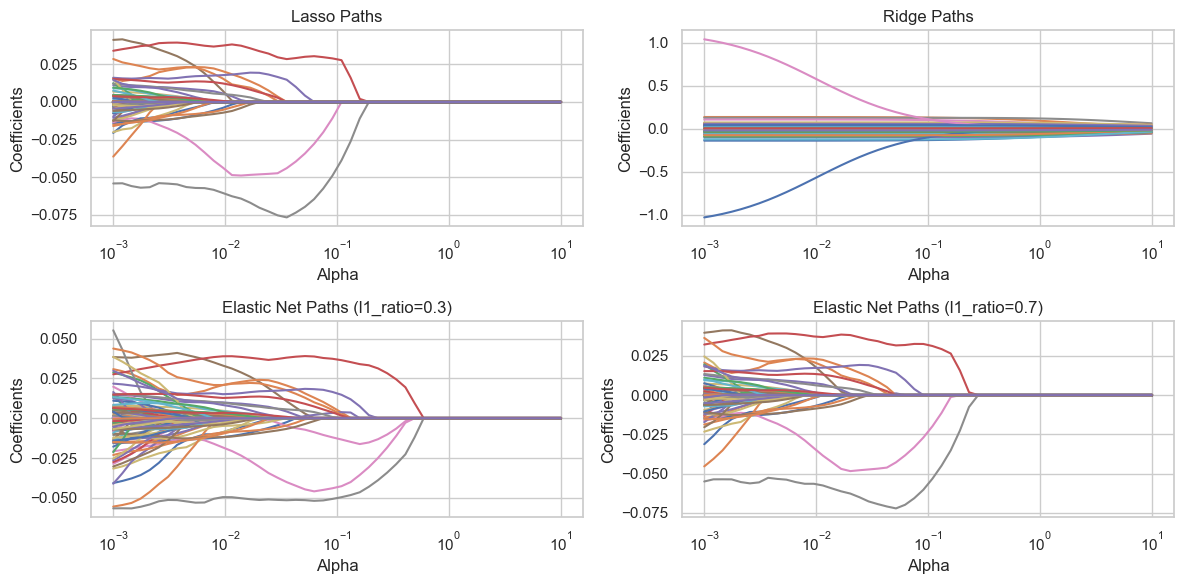

In [170]:
alphas = np.logspace(-3, 1, 50)

lasso_coefs = []
ridge_coefs = []
elastic_coefs_1 = []  # Elastic Net for l1_ratio = 0.3
elastic_coefs_2 = []  # Elastic Net for l1_ratio = 0.7

for alpha in alphas:
    lasso = Lasso(alpha=alpha).fit(X_train, y_train)
    ridge = Ridge(alpha=alpha).fit(X_train, y_train)
    elastic_net_1 = ElasticNet(alpha=alpha, l1_ratio=0.3).fit(X_train, y_train)
    elastic_net_2 = ElasticNet(alpha=alpha, l1_ratio=0.7).fit(X_train, y_train)

    lasso_coefs.append(lasso.coef_)
    ridge_coefs.append(ridge.coef_)
    elastic_coefs_1.append(elastic_net_1.coef_)
    elastic_coefs_2.append(elastic_net_2.coef_)

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(alphas, np.array(lasso_coefs))
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Lasso Paths')

plt.subplot(2, 2, 2)
plt.plot(alphas, np.array(ridge_coefs))
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Ridge Paths')

plt.subplot(2, 2, 3)
plt.plot(alphas, np.array(elastic_coefs_1))
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Elastic Net Paths (l1_ratio=0.3)')

plt.subplot(2, 2, 4)
plt.plot(alphas, np.array(elastic_coefs_2))
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Elastic Net Paths (l1_ratio=0.7)')

plt.tight_layout()
plt.show()


In [171]:
all_selected_features = {
    "OLS": set(important_features_ols),
    "Best Subset": set(best_features_subset),
    "Step-wise": set(best_features_stepwise),
    "Lasso": set(important_features_lasso),
    "Elastic Net": set(important_features_elastic),
}


feature_counts = {}
for method, features in all_selected_features.items():
    for feature in features:
        feature_counts[feature] = feature_counts.get(feature, 0) + 1

#
sorted_features = sorted(feature_counts.items(), key=lambda x: x[1], reverse=True)
print("the most significant feature（by the fruquency）:", sorted_features)


the most significant feature（by the fruquency）: [(47, 4), (74, 3), (6, 3), (53, 3), (0, 2), (71, 2), (77, 2), (14, 2), (51, 2), (31, 2), (69, 1), (42, 1), (78, 1), (24, 1), (5, 1), (13, 1), (16, 1), (18, 1), (21, 1), (28, 1), (34, 1), (41, 1), (44, 1), (89, 1), (90, 1), (91, 1), (93, 1), (111, 1), (46, 1)]


In [172]:

import pandas as pd

important_features = {
    47: "PersPerFam",
    74: "PctHousLess3BR",
    6: "householdsize",
    53: "NumIlleg",
    0: "state",
    71: "PersPerRentOccHous",
    77: "PctHousOwnOcc",
    51: "PctWorkMomYoungKids",
    91: "MedRentPctHousInc",
    31: "NumUnderPov",
    
}

feature_indices = list(important_features.keys())

df_selected = df.iloc[:, feature_indices]
df_selected.columns = [important_features[idx] for idx in feature_indices]

output_file = "selected_features_with_names.csv"
df_selected.to_csv(output_file, index=False)

print(f"{output_file}")


selected_features_with_names.csv


In [173]:
import pandas as pd

# Load the dataset
file_path = "selected_features_with_names.csv"
df = pd.read_csv(file_path)

# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Check for missing values (NaN)
missing_values = df.isnull().sum()

# Identify outliers using Z-score method (assuming numerical data)
from scipy.stats import zscore

numerical_cols = df.select_dtypes(include=['number']).columns
z_scores = df[numerical_cols].apply(zscore)
outliers = (z_scores.abs() > 3).sum()

# Display results
duplicate_rows_count = duplicate_rows.shape[0]
missing_values_summary = missing_values[missing_values > 0]
outliers_summary = outliers[outliers > 0]

# Show results
results = {
    "Duplicate Rows": duplicate_rows_count,
    "Missing Values": missing_values_summary.to_dict(),
    "Outliers": outliers_summary.to_dict()
}

results


{'Duplicate Rows': 0,
 'Missing Values': {},
 'Outliers': {'PersPerFam': 14,
  'householdsize': 65,
  'NumIlleg': 45,
  'state': 37,
  'NumUnderPov': 50}}

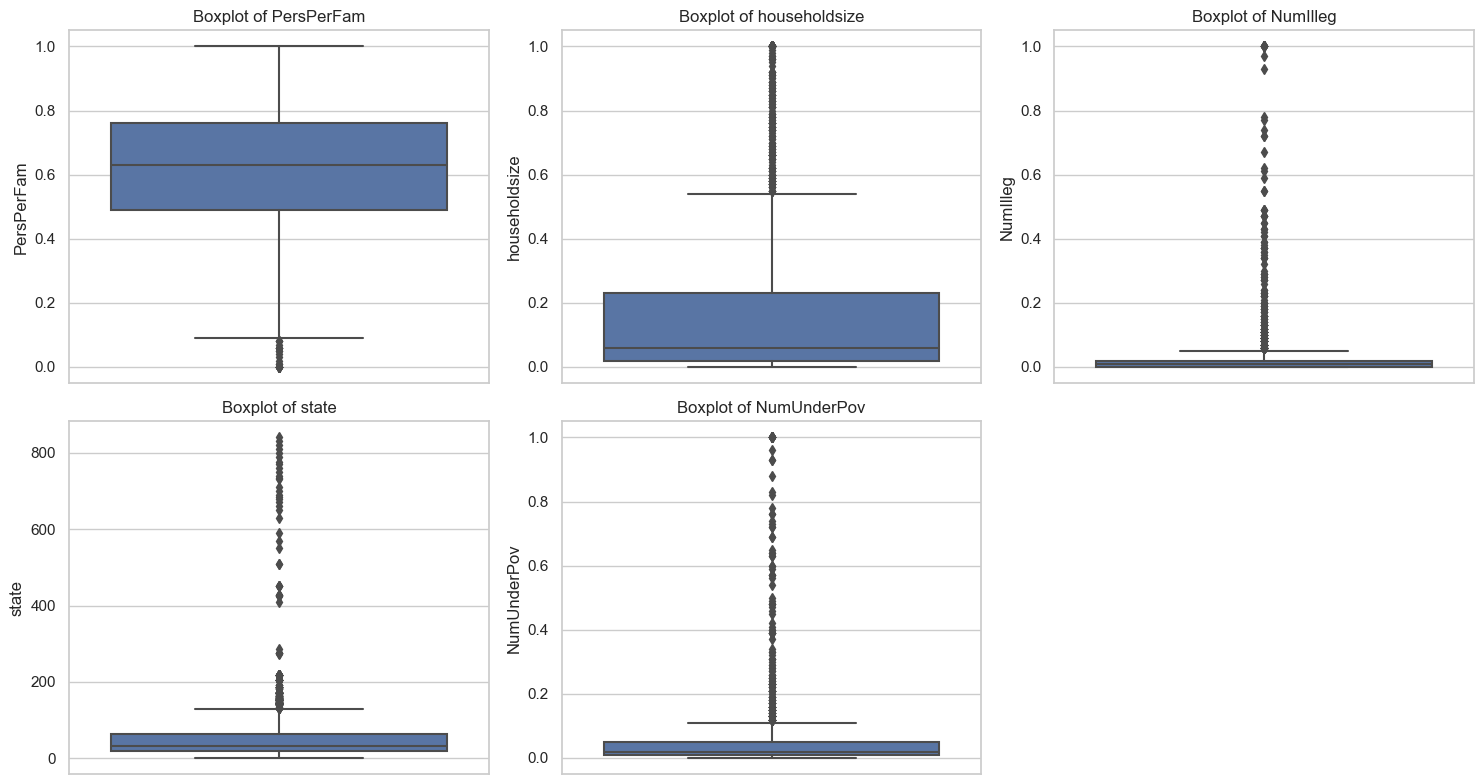

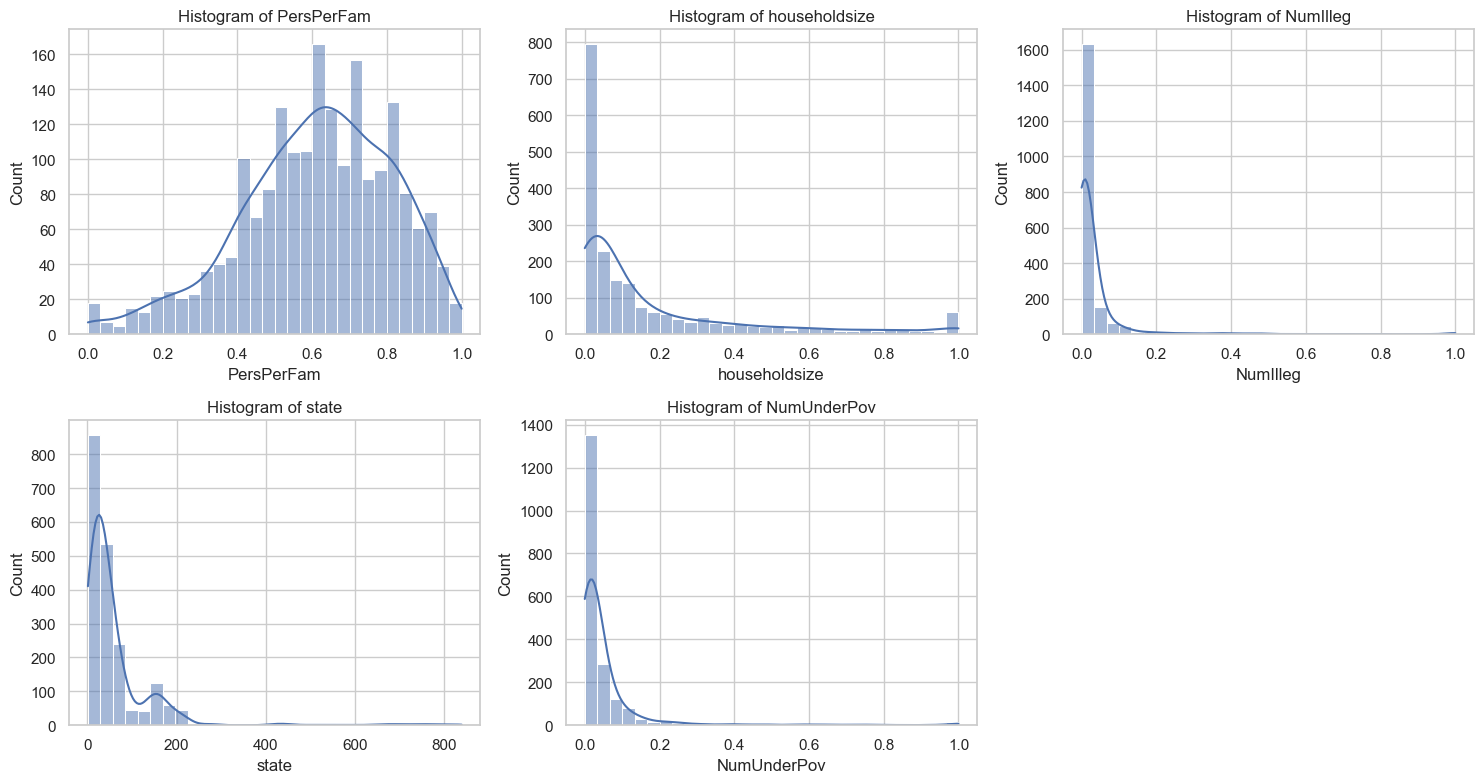

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(15, 8))

# Create boxplots for each column with detected outliers
for i, col in enumerate(["PersPerFam", "householdsize", "NumIlleg", "state", "NumUnderPov"], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

# Create histograms to show distribution of these columns
plt.figure(figsize=(15, 8))

for i, col in enumerate(["PersPerFam", "householdsize", "NumIlleg", "state", "NumUnderPov"], 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.show()


In [175]:
import numpy as np
import pandas as pd
from scipy.stats import mstats



# Winsorization for 'PersPerFam' 
# Replacing extreme values with the 5th and 95th percentile values
df["PersPerFam"] = mstats.winsorize(df["PersPerFam"], limits=[0.05, 0.05])

# Log Transformation & Winsorization for 'householdsize' 
df["householdsize"] = np.log1p(df["householdsize"])  # log(x+1) transformation
df["householdsize"] = mstats.winsorize(df["householdsize"], limits=[0.05, 0.05])

# Log Transformation & Winsorization for 'NumIlleg'
df["NumIlleg"] = np.log1p(df["NumIlleg"])  # log(x+1) transformation
df["NumIlleg"] = mstats.winsorize(df["NumIlleg"], limits=[0.05, 0.05])

# Handling 'state' (Categorical or Erroneous Values) 
# Checking unique values to determine if it is categorical
unique_states = df["state"].unique()
if max(unique_states) > 100:  # Assuming state codes should be within a reasonable range
    df = df[df["state"] <= 100]  # Removing out-of-range state codes

# Log Transformation & Winsorization for 'NumUnderPov' 
df["NumUnderPov"] = np.log1p(df["NumUnderPov"])  # log(x+1) transformation
df["NumUnderPov"] = mstats.winsorize(df["NumUnderPov"], limits=[0.05, 0.05])



In [176]:
df = df.reset_index(drop=True)
df_original = df_original.reset_index(drop=True)
df["ViolentCrimesPerPop"] = df_original["feature_126"]
df.head()

,PersPerFam,PctHousLess3BR,householdsize,NumIlleg,state,PersPerRentOccHous,PctHousOwnOcc,PctWorkMomYoungKids,MedRentPctHousInc,NumUnderPov,ViolentCrimesPerPop
0,0.43,0.0,0.113329,0.000000,65,0.26,0.24,0.46,0.32,0.00995,0.67
1,0.42,0.5,0.398776,0.009950,65,0.42,0.41,0.71,0.39,0.00995,0.43
2,0.65,0.5,0.598837,0.029559,5,0.94,0.96,0.85,0.51,0.00995,0.12
3,0.91,0.5,0.019803,0.000000,95,0.89,0.87,0.40,0.51,0.00000,0.03
4,0.62,0.0,0.058269,0.000000,13,0.39,0.30,0.30,0.59,0.00995,0.14


In [177]:
# Save the cleaned dataset
df.to_csv("cleaned_selected_features.csv", index=False)
print("Outlier handling completed. Cleaned dataset saved as 'cleaned_selected_features.csv'.")

Outlier handling completed. Cleaned dataset saved as 'cleaned_selected_features.csv'.


In [178]:
# Load the dataset
file_path = "cleaned_selected_features.csv"
df = pd.read_csv(file_path)

# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Check for missing values (NaN)
missing_values = df.isnull().sum()

# Identify outliers using Z-score method (assuming numerical data)
from scipy.stats import zscore

numerical_cols = df.select_dtypes(include=['number']).columns
z_scores = df[numerical_cols].apply(zscore)
outliers = (z_scores.abs() > 3).sum()

# Display results
duplicate_rows_count = duplicate_rows.shape[0]
missing_values_summary = missing_values[missing_values > 0]
outliers_summary = outliers[outliers > 0]

# Show results
results = {
    "Duplicate Rows": duplicate_rows_count,
    "Missing Values": missing_values_summary.to_dict(),
    "Outliers": outliers_summary.to_dict()
}

results

{'Duplicate Rows': 0,
 'Missing Values': {},
 'Outliers': {'NumIlleg': 72, 'state': 3, 'ViolentCrimesPerPop': 43}}

## EDA PART 1 ##

In [179]:
#  Exploratory Data Analysis

df = pd.read_csv(file_path)

sns.set_style("whitegrid")
print("Summary statistics for numerical columns:")
print(df.describe())
# plt.figure(figsize=(8, 5))
# sns.histplot(data=df, x='NumUnderPov', kde=True, color='blue')
# plt.title("Distribution of Poverty Rate (NumUnderPov)")
# plt.xlabel("Poverty Rate")
# plt.ylabel("Count")
# plt.show()
# plt.figure(figsize=(8, 5))
# sns.histplot(data=df, x='MedRentPctHousInc', kde=True, color='green')
# plt.title("Distribution of Median Rent as % of Household Income")
# plt.xlabel("Median Rent % of Household Income")
# plt.ylabel("Count")
# plt.show()
# plt.figure(figsize=(8, 5))
# sns.histplot(data=df, x='PctHousOwnOcc', kde=True, color='orange')
# plt.title("Distribution of % of Owned Housing (PctHousOwnOcc)")
# plt.xlabel("% of Owned Housing")
# plt.ylabel("Count")
# plt.show()
# fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# sns.histplot(data=df, x='NumUnderPov', kde=True, ax=axs[0])
# sns.histplot(data=df, x='MedRentPctHousInc', kde=True, ax=axs[1])
# sns.histplot(data=df, x='PctHousOwnOcc', kde=True, ax=axs[2])

# axs[0].set_title('NumUnderPov')
# axs[1].set_title('MedRentPctHousInc')
# axs[2].set_title('PctHousOwnOcc')

# plt.tight_layout()
# plt.show()


Summary statistics for numerical columns:
        PersPerFam  PctHousLess3BR  householdsize     NumIlleg        state  \
count  1665.000000     1665.000000    1665.000000  1665.000000  1665.000000   
mean      0.621718        0.318318       0.136741     0.019099    31.977177   
std       0.188362        0.256281       0.172172     0.029483    21.892316   
min       0.230000        0.000000       0.000000     0.000000     1.000000   
25%       0.490000        0.000000       0.019803     0.000000    15.000000   
50%       0.640000        0.500000       0.058269     0.009950    27.000000   
75%       0.780000        0.500000       0.190620     0.019803    47.000000   
max       0.910000        1.000000       0.598837     0.122218    99.000000   

       PersPerRentOccHous  PctHousOwnOcc  PctWorkMomYoungKids  \
count         1665.000000    1665.000000          1665.000000   
mean             0.569033       0.553568             0.497231   
std              0.199624       0.187884           

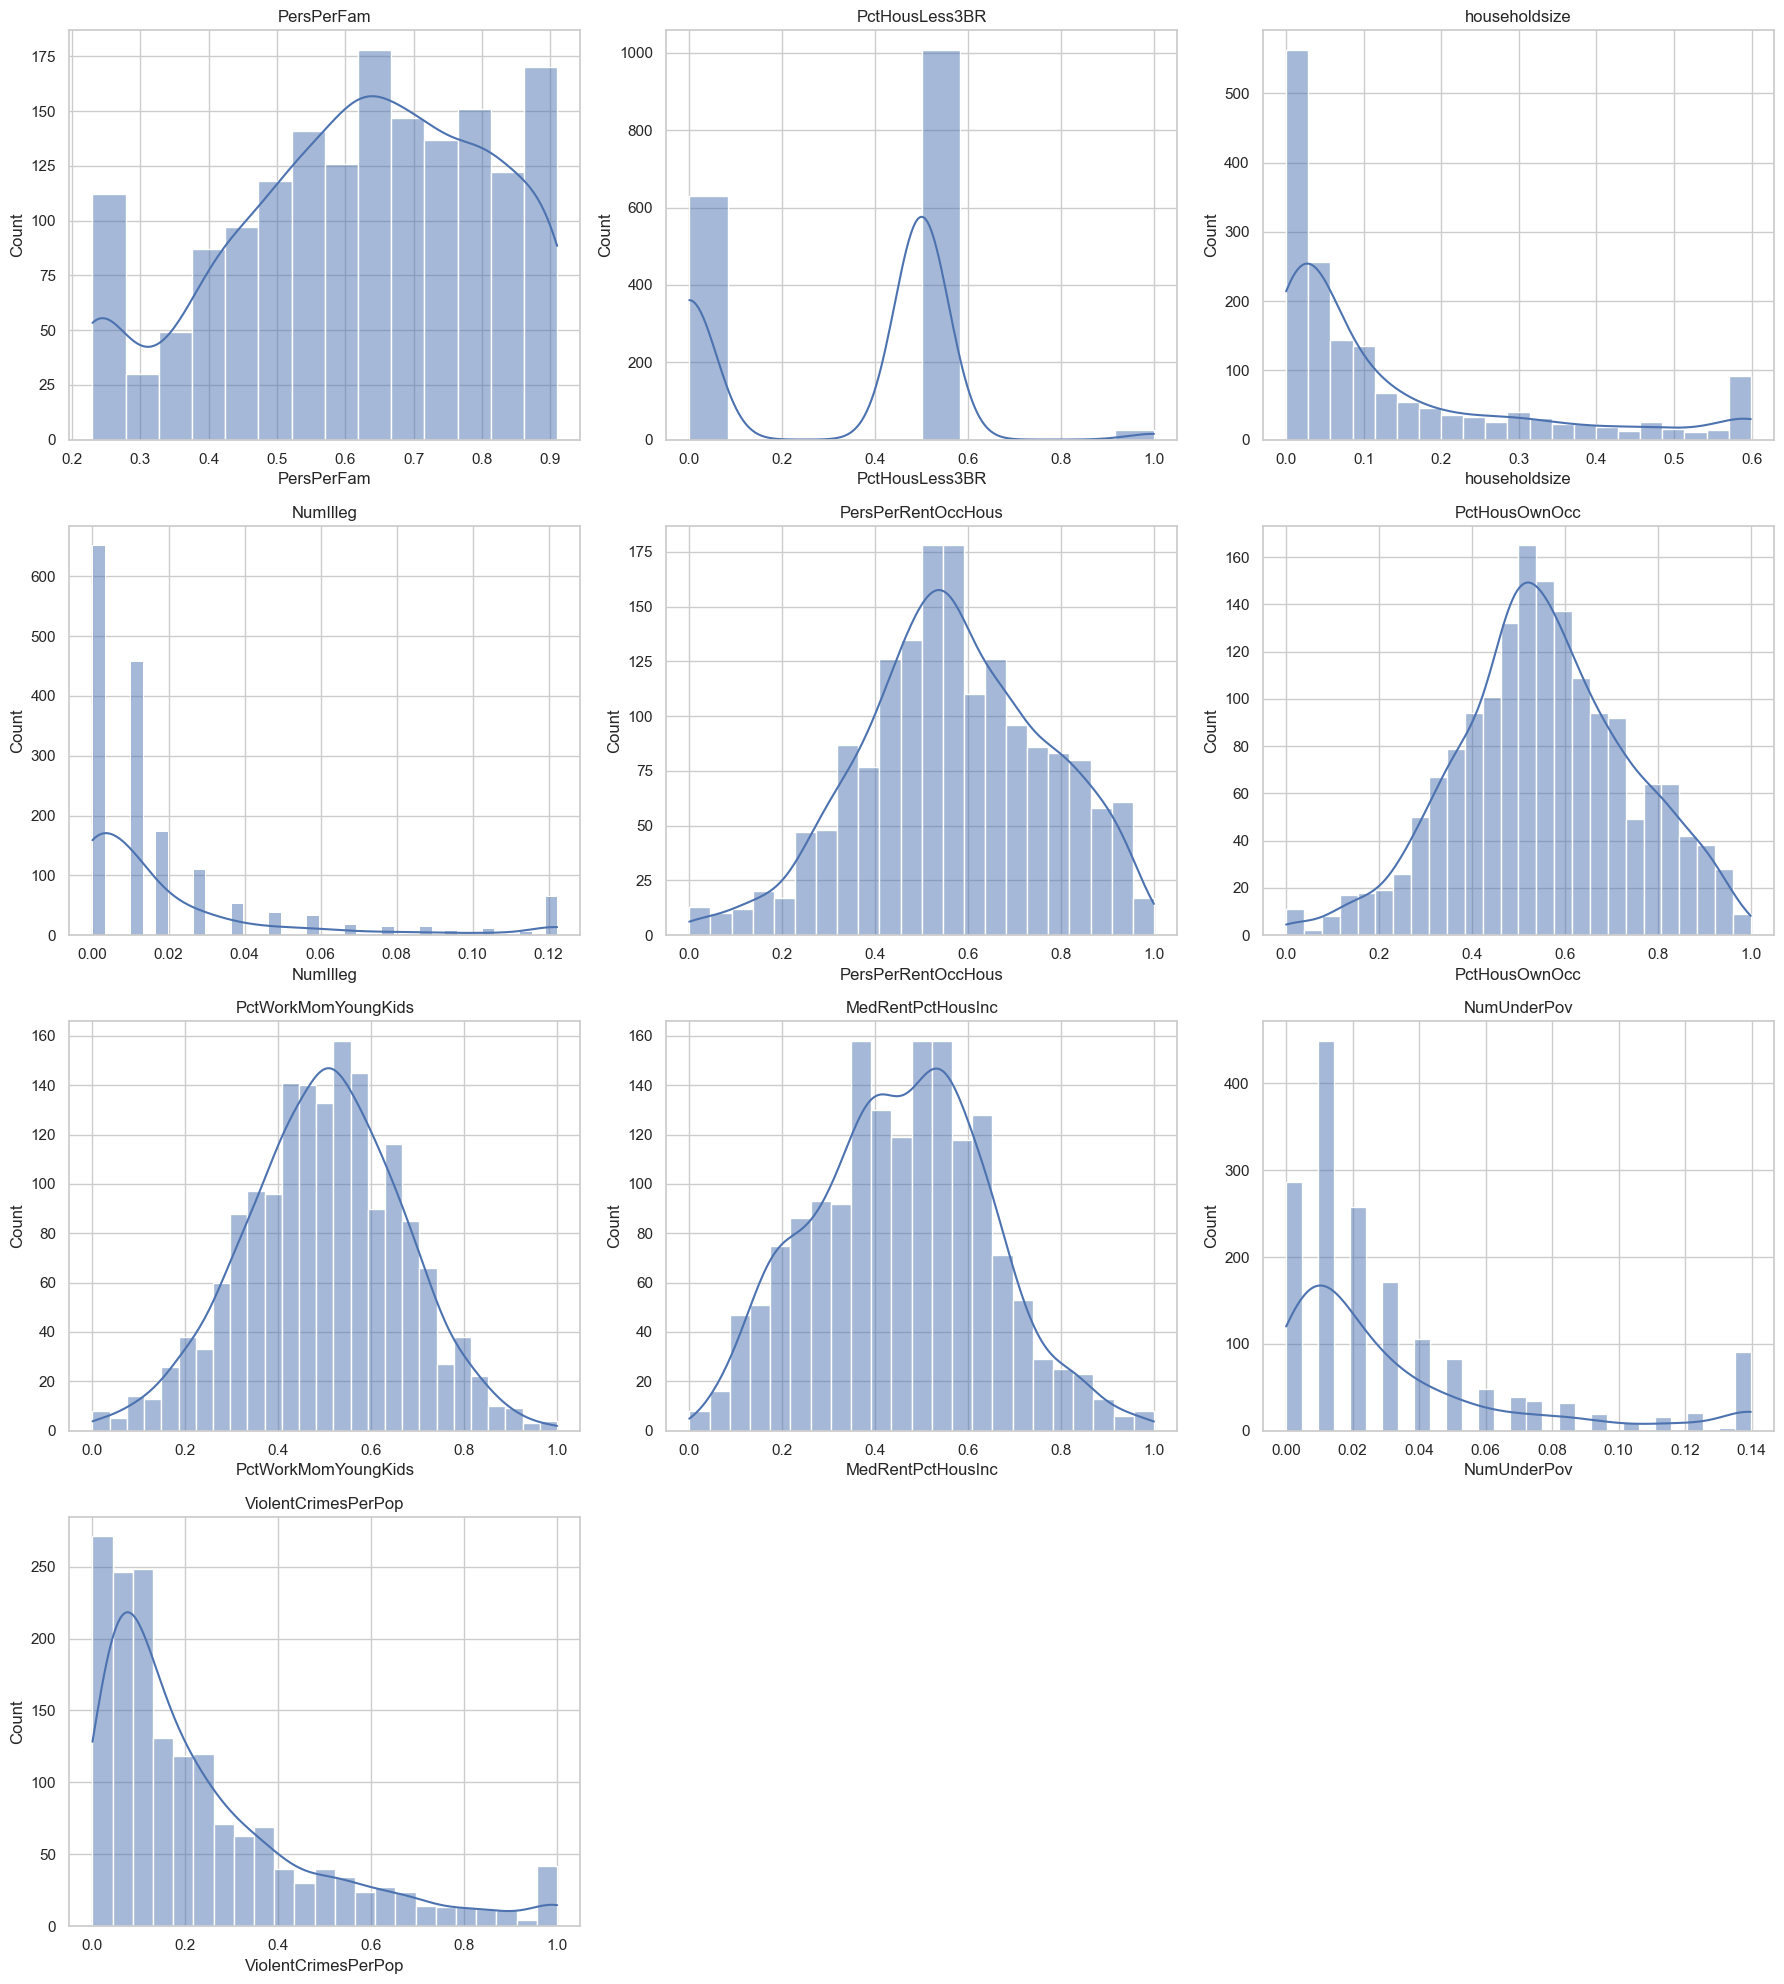

In [180]:
# Select all numeric features (excluding 'state')
numeric_cols = df.select_dtypes(include=[np.number]).columns.drop('state', errors='ignore')
num_features = len(numeric_cols)

# Calculate the number of subplot rows, with three subplots in each row
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols # Use ceiling (round up)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))
axs = axs.flatten()  # Flatten the subplot array for easier indexing

for i, col in enumerate(numeric_cols):
    sns.histplot(data=df, x=col, kde=True, ax=axs[i])
    axs[i].set_title(col)

# Remove extra subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

/var/folders/3c/n9d1w23x42j0l_99f4_8sl5w0000gn/T/ipykernel_5099/2192820472.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, shade=True, color='green', ax=axs[i])
/var/folders/3c/n9d1w23x42j0l_99f4_8sl5w0000gn/T/ipykernel_5099/2192820472.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, shade=True, color='green', ax=axs[i])
/var/folders/3c/n9d1w23x42j0l_99f4_8sl5w0000gn/T/ipykernel_5099/2192820472.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, shade=True, color='green', ax=axs[i])
/var/folders/3c/n9d1w23x42j0l_99f4_8sl5w0000gn/T/ipykernel_5099/2192820472.py:9: Futu

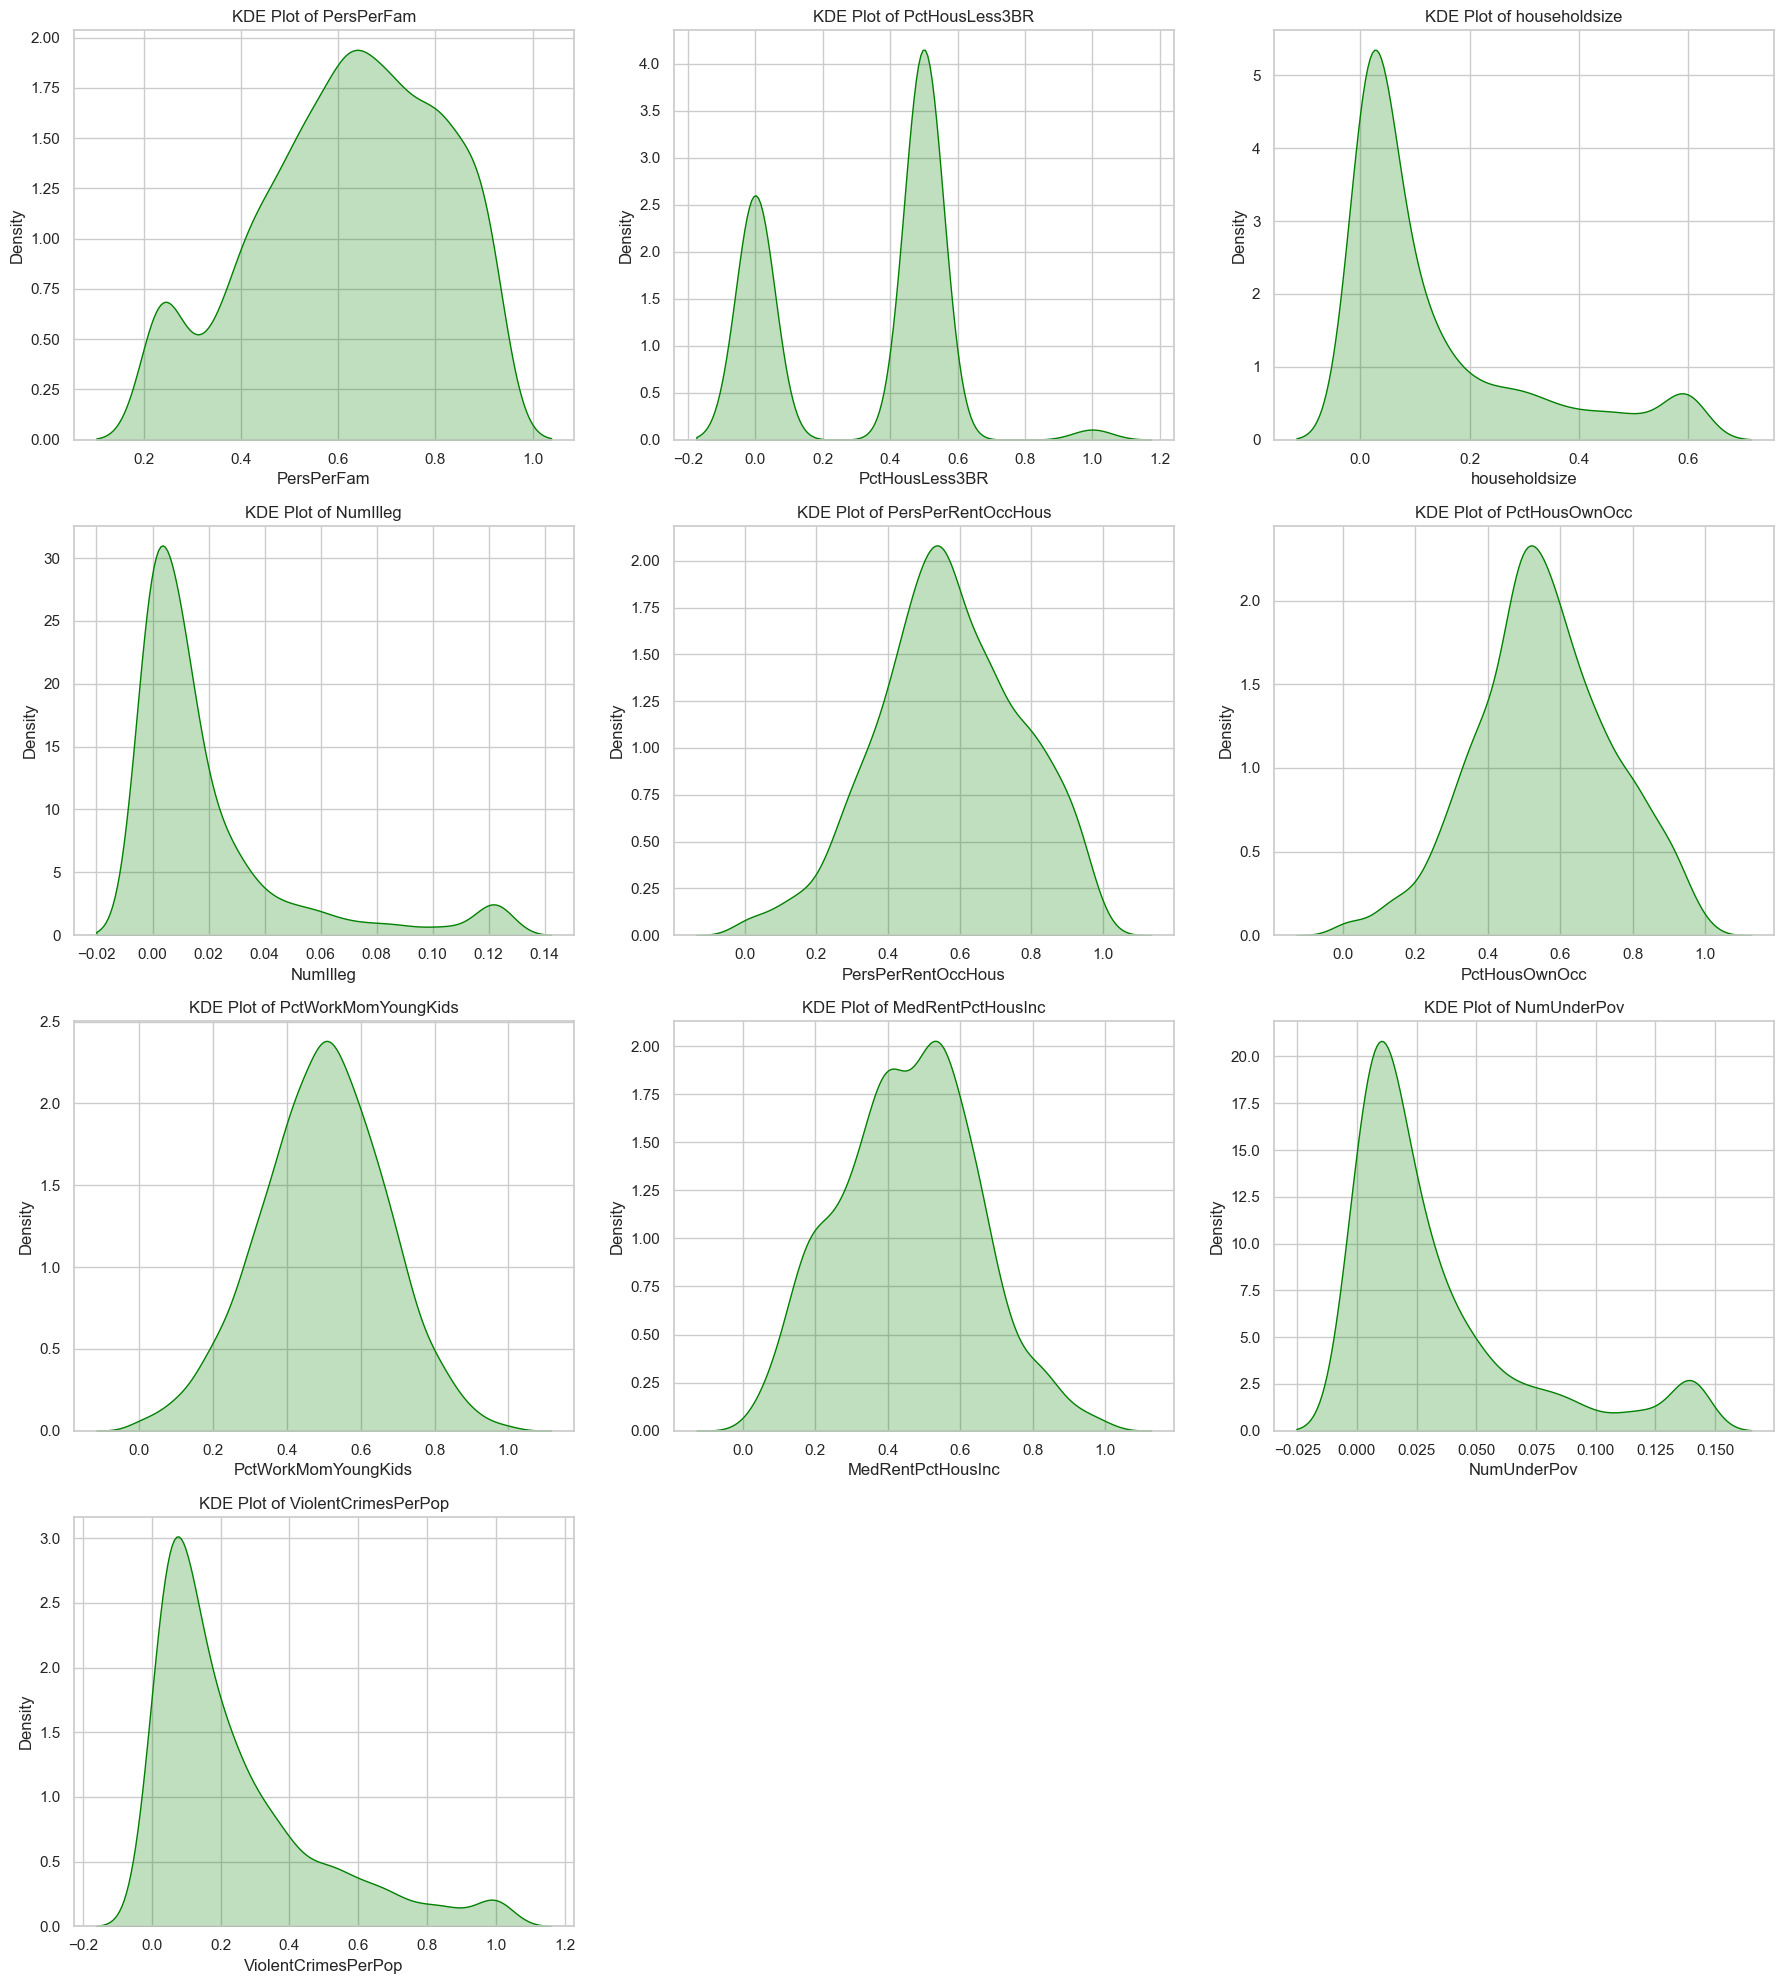

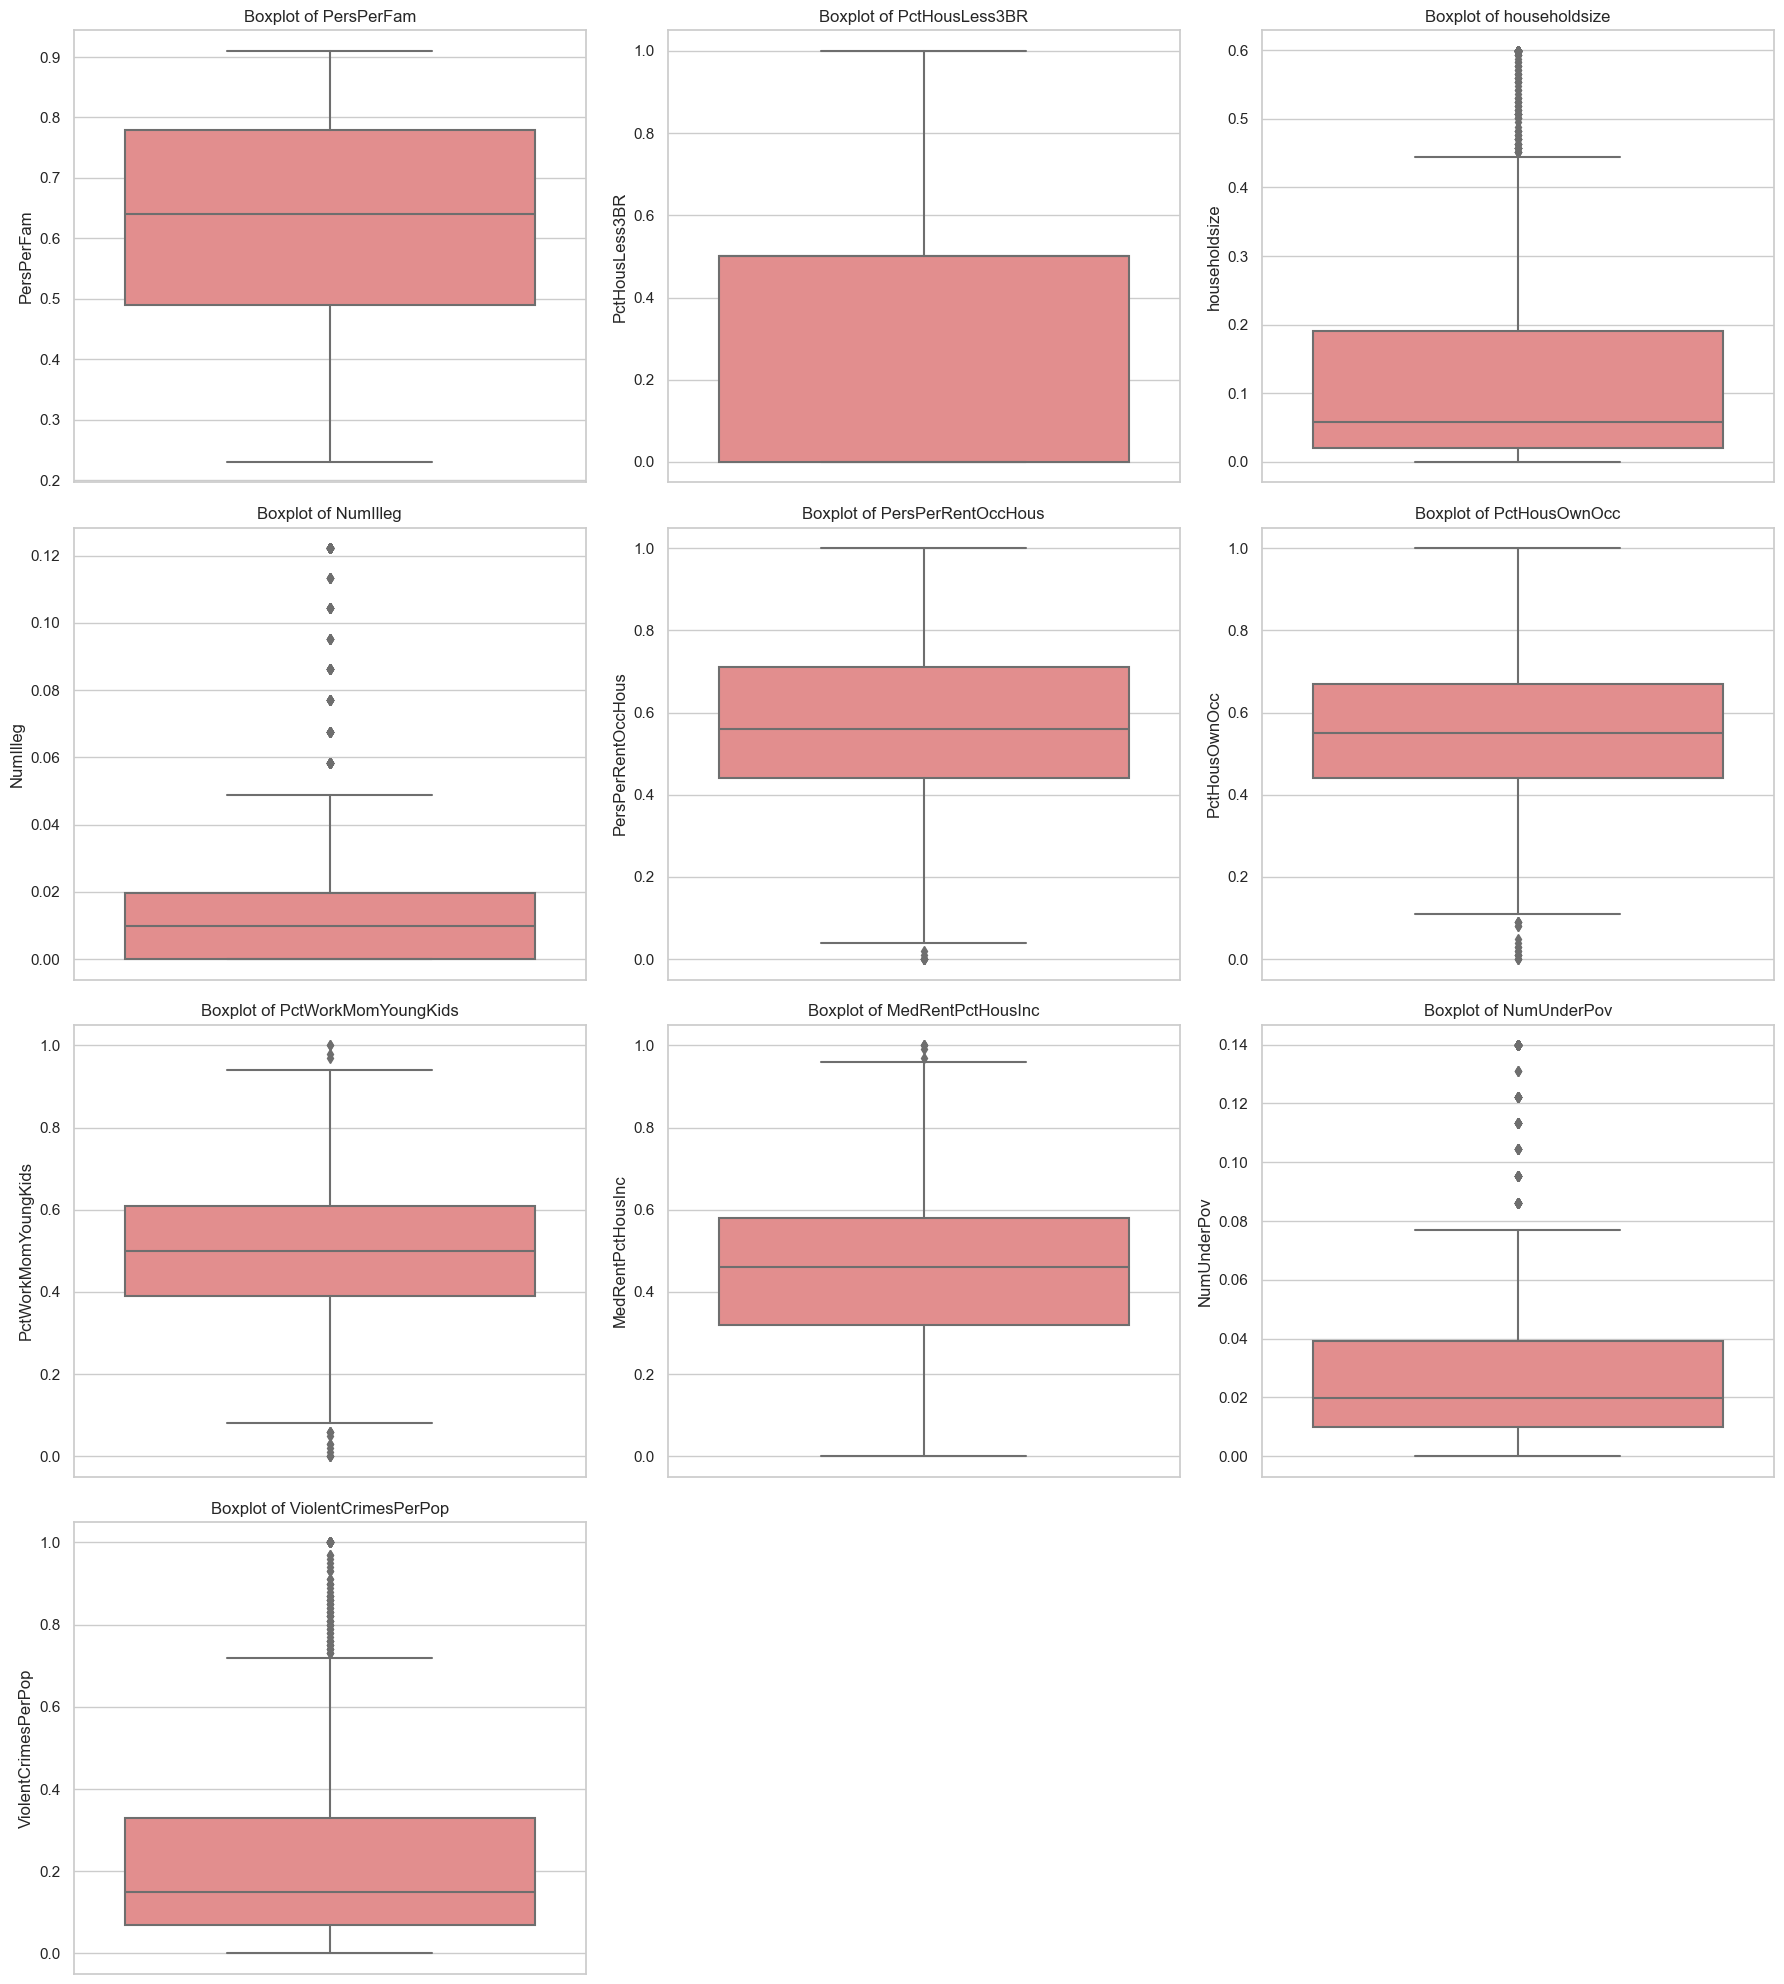

In [181]:
# KDE Plots (3 per row)
# Create a grid of histograms for each numeric column
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols
fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))
axs = axs.flatten()

for i, col in enumerate(numeric_cols):
    sns.kdeplot(data=df, x=col, shade=True, color='green', ax=axs[i])
    axs[i].set_title(f'KDE Plot of {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Density')

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

# Boxplots to detect outliers (3 per row)
fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))
axs = axs.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df[col], color='lightcoral', ax=axs[i])
    axs[i].set_title(f'Boxplot of {col}')
    axs[i].set_ylabel(col)

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


## EDA PART2 ##

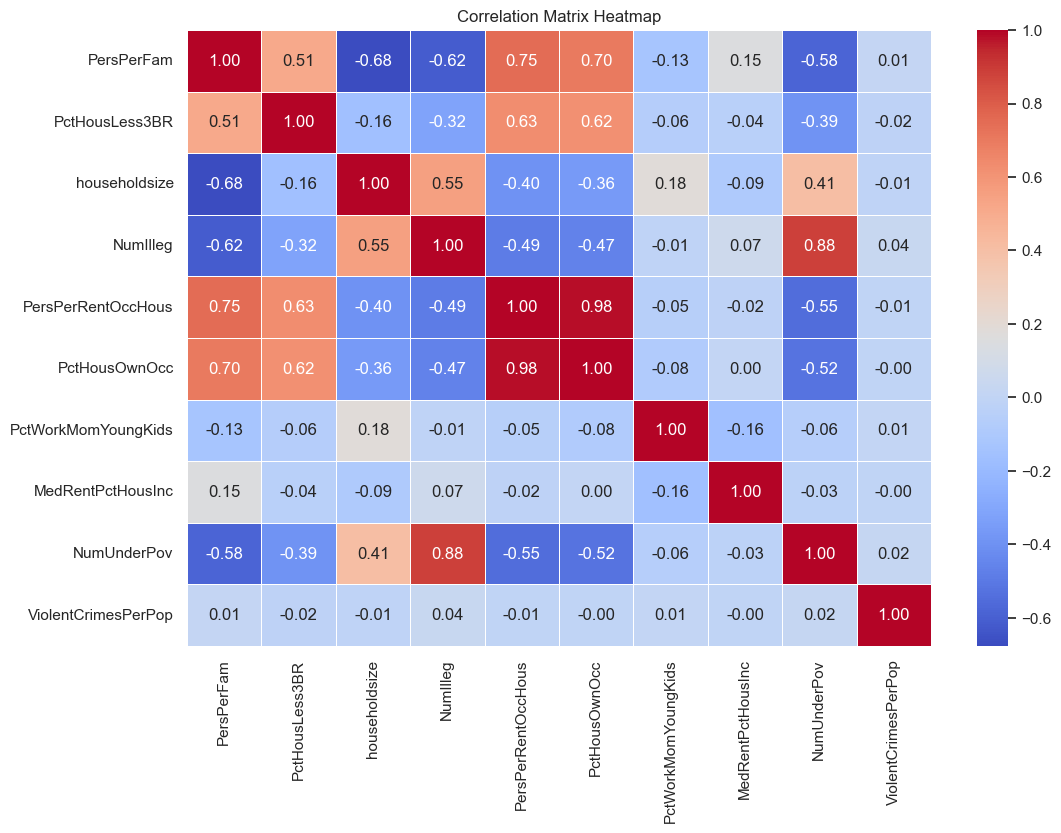

In [182]:



# Convert 'state' to categorical
df['state'] = df['state'].astype(str)

# Set Seaborn style
sns.set(style="whitegrid")
# Summary Statistics
# print("Summary statistics for numerical columns:")
# print(df.describe())
# Correlation Matrix & Heatmap
plt.figure(figsize=(12, 8))
corr = df.drop(columns=['state']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

     


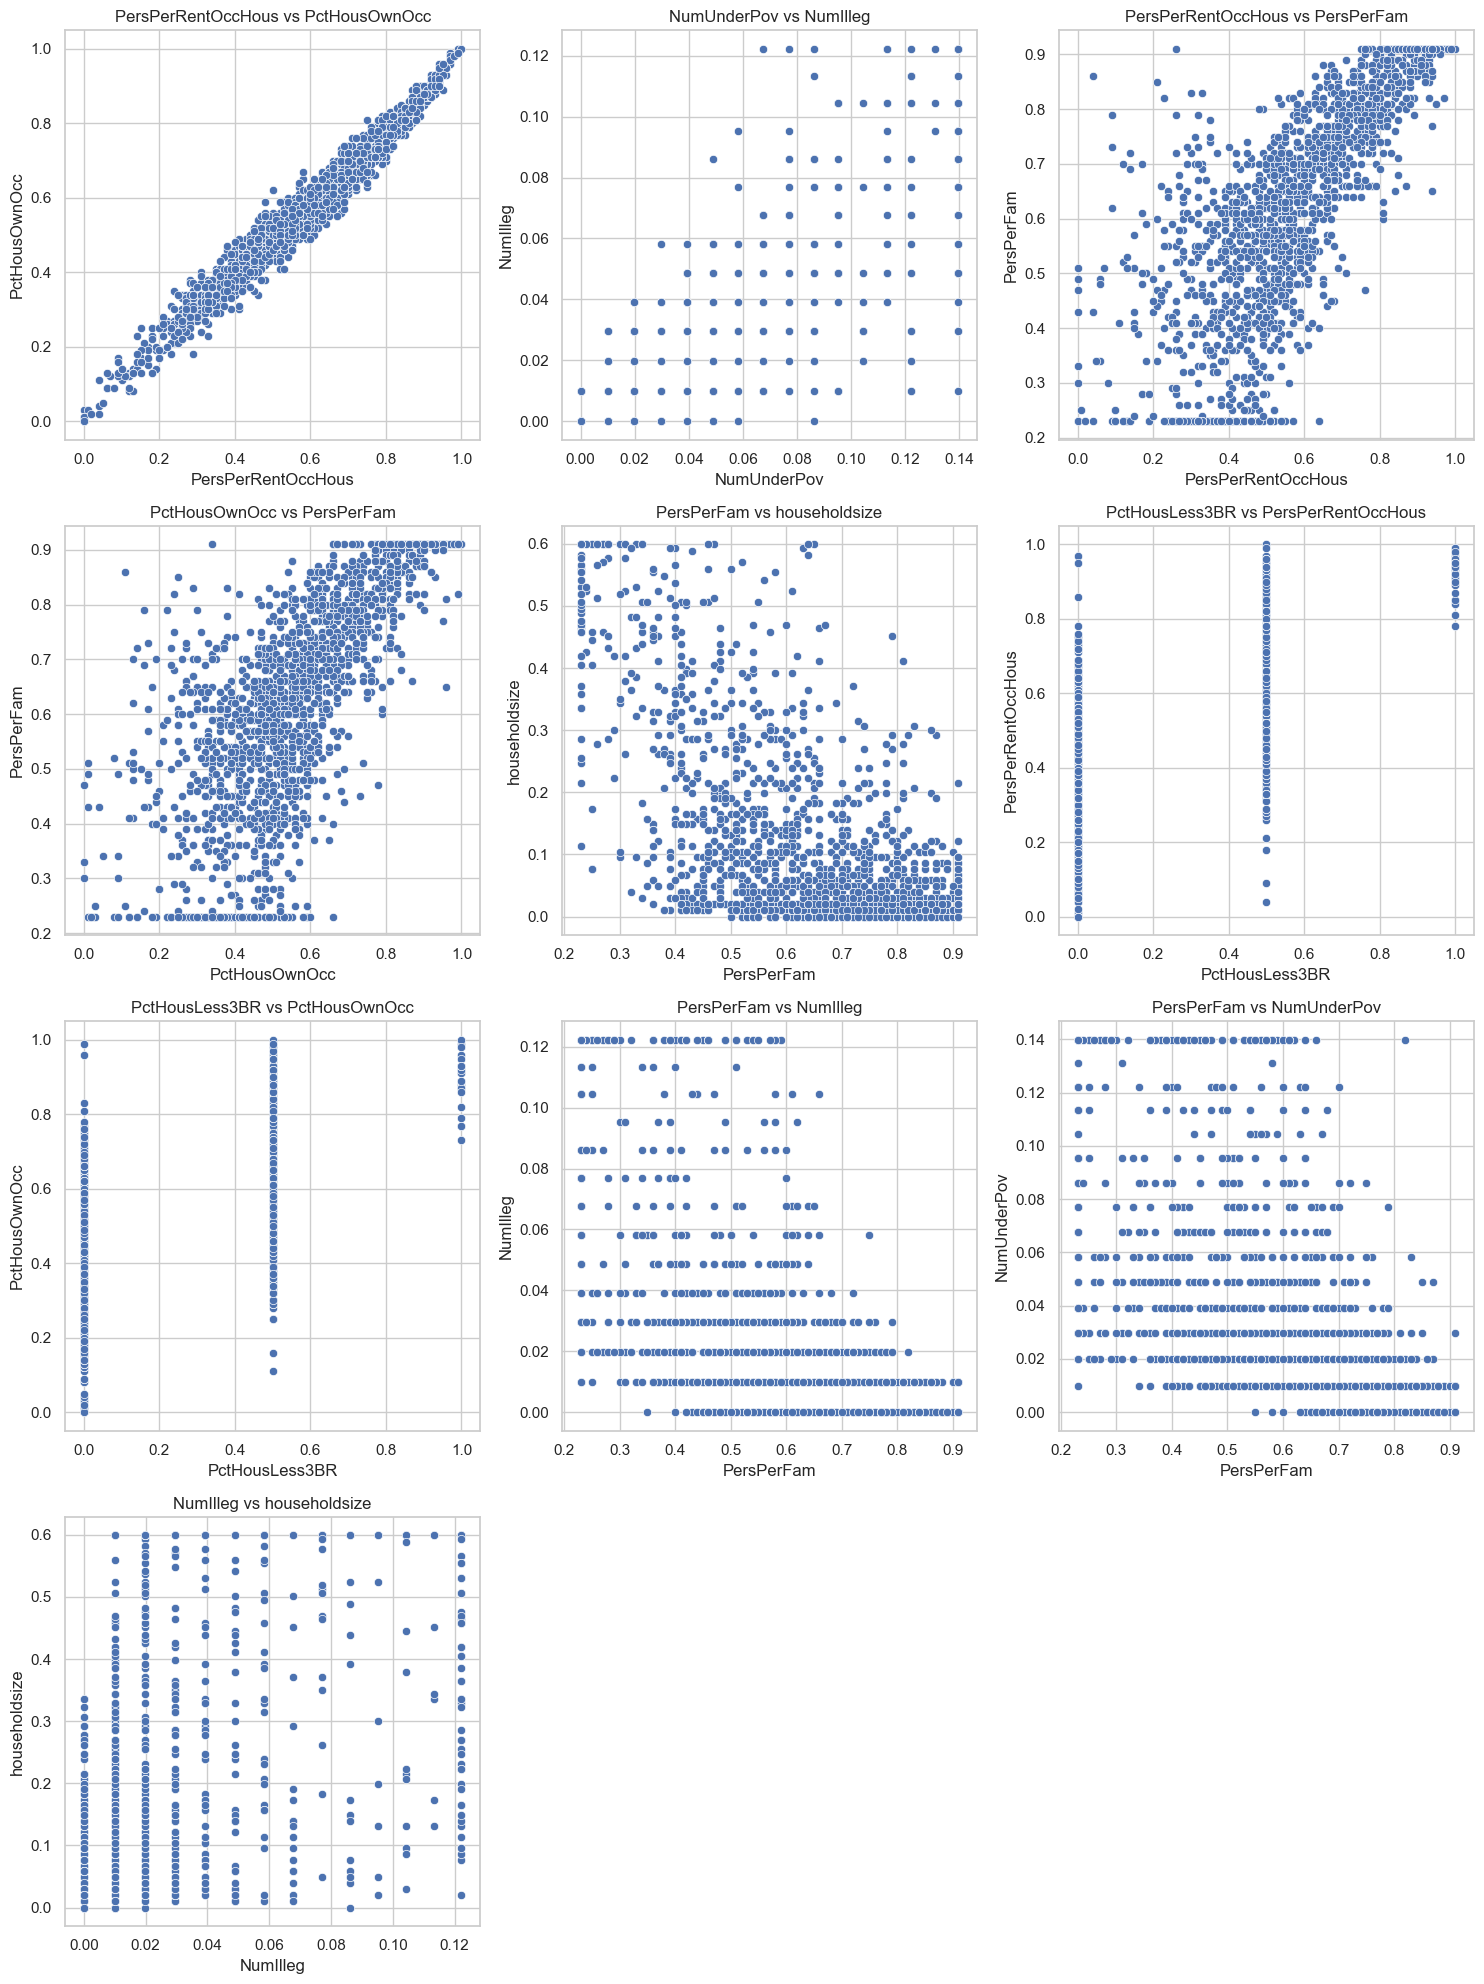

In [183]:
# Identify 10 most highly correlated feature pairs (absolute correlation > 0.5)
correlated_pairs = corr.abs().unstack().sort_values(ascending=False)
correlated_pairs = correlated_pairs[correlated_pairs < 1].drop_duplicates()
top_pairs = correlated_pairs[correlated_pairs > 0.5].index.tolist()[:10]

# Scatter Plots of 10 most highly correlated feature pairs with swapped axes
n_pairs = len(top_pairs)
plt.figure(figsize=(15, 5 * (n_pairs // 3 + 1)))  # Adjust figure size dynamically
for i, (x_feature, y_feature) in enumerate(top_pairs):
    plt.subplot((n_pairs // 3) + 1, 3, i+1)
    sns.scatterplot(x=df[y_feature], y=df[x_feature])  # Swap x and y axes
    plt.xlabel(y_feature)  # Swap labels accordingly
    plt.ylabel(x_feature)
    plt.title(f"{y_feature} vs {x_feature}")
plt.tight_layout()
plt.show()


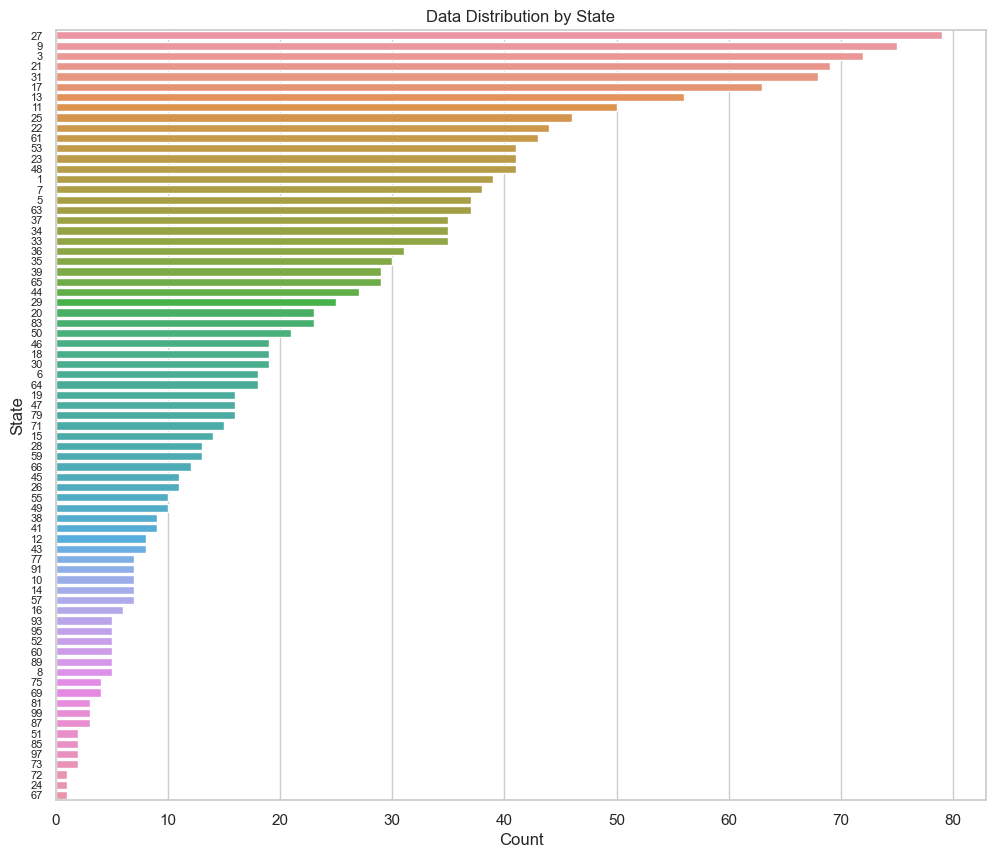

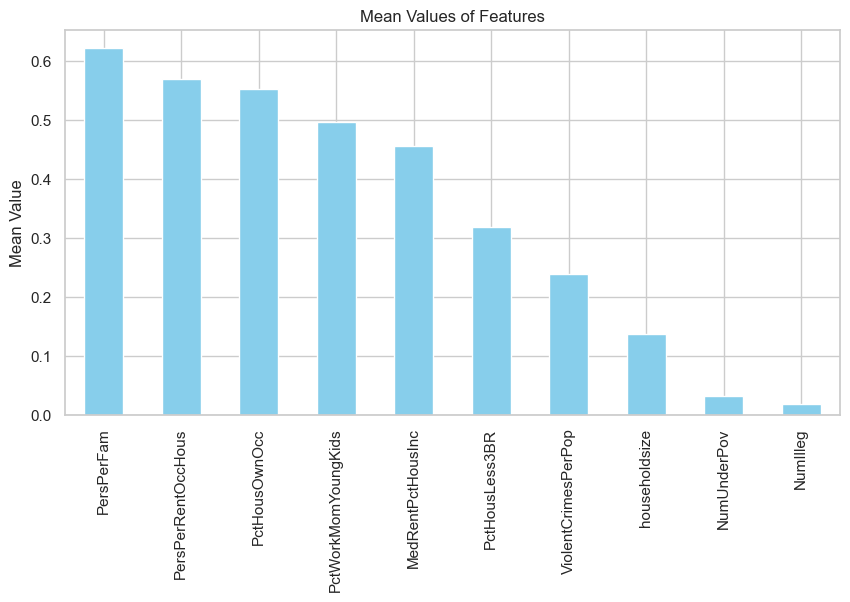

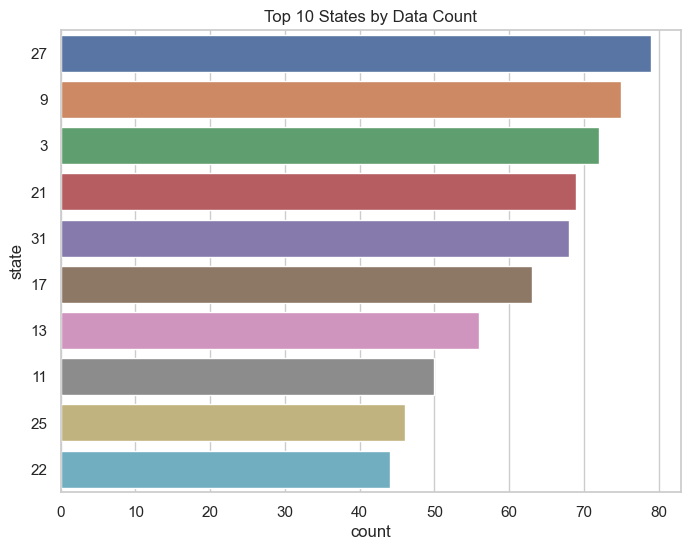

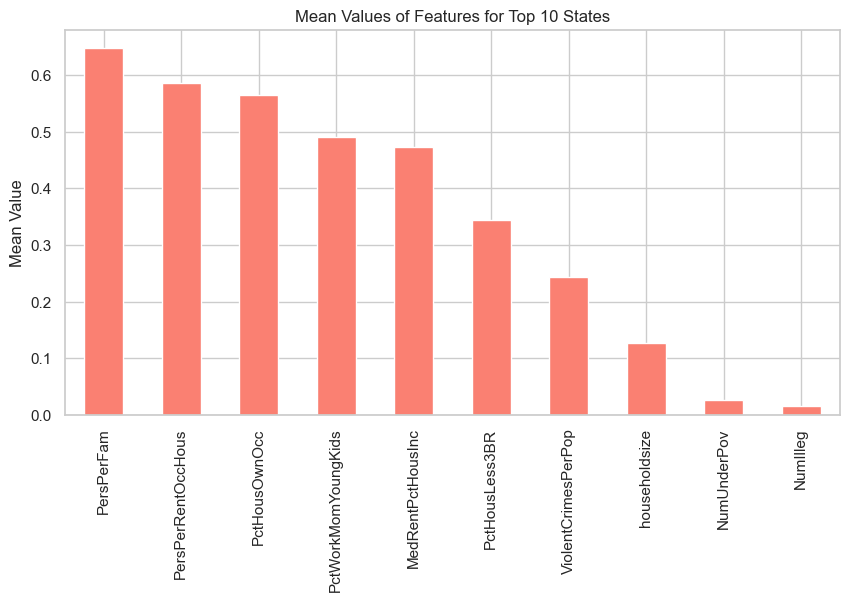

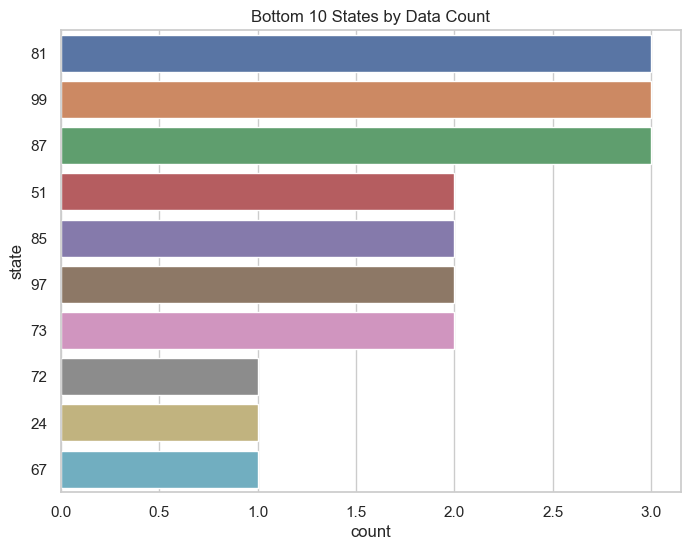

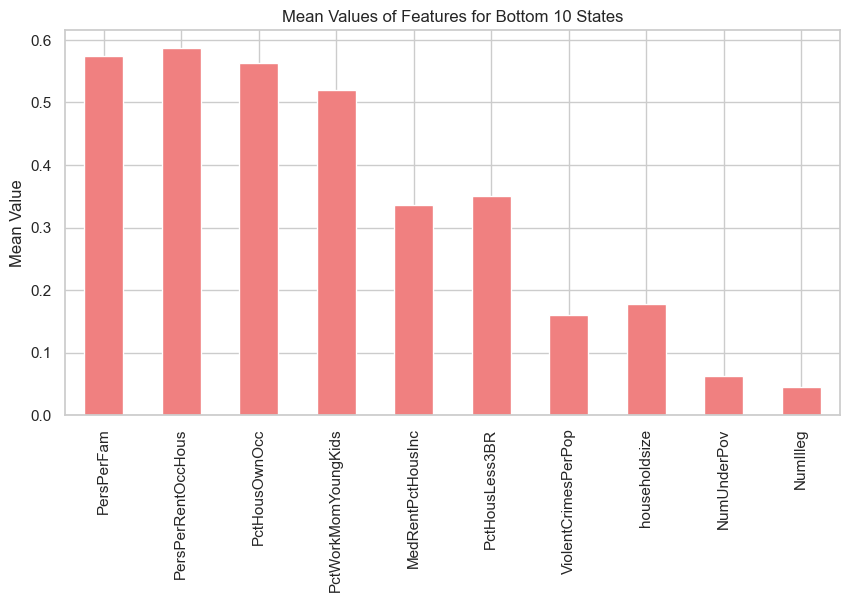

In [147]:

# Bar Charts

# Data Count Across All States
plt.figure(figsize=(12, 10))
sns.countplot(y=df['state'], order=df['state'].value_counts().index)
plt.xlabel("Count")
plt.ylabel("State")
plt.title("Data Distribution by State")
plt.yticks(fontsize=8)
plt.show()

# Mean Values of Features Across All States
feature_order = df.drop(columns=['state']).mean().sort_values(ascending=False).index
plt.figure(figsize=(10, 5))
feature_means = df.drop(columns=['state']).mean()[feature_order]
feature_means.plot(kind='bar', color='skyblue')
plt.title("Mean Values of Features")
plt.ylabel("Mean Value")
plt.xticks(rotation=90)
plt.show()

# Top 10 States by Data Count
plt.figure(figsize=(8, 6))
sns.countplot(y=df['state'], order=df['state'].value_counts().index[:10])
plt.title("Top 10 States by Data Count")
plt.show()

# Mean Values of Features for Top 10 States
top_10_states = df[df['state'].isin(df['state'].value_counts().index[:10])]
plt.figure(figsize=(10, 5))
top_10_feature_means = top_10_states.drop(columns=['state']).mean()[feature_order]
top_10_feature_means.plot(kind='bar', color='salmon')
plt.title("Mean Values of Features for Top 10 States")
plt.ylabel("Mean Value")
plt.xticks(rotation=90)
plt.show()

# Bottom 10 States by Data Count
plt.figure(figsize=(8, 6))
sns.countplot(y=df['state'], order=df['state'].value_counts().index[-10:])
plt.title("Bottom 10 States by Data Count")
plt.show()

# Mean Values of Features for Bottom 10 States
bottom_10_states = df[df['state'].isin(df['state'].value_counts().index[-10:])]
plt.figure(figsize=(10, 5))
bottom_10_feature_means = bottom_10_states.drop(columns=['state']).mean()[feature_order]
bottom_10_feature_means.plot(kind='bar', color='lightcoral')
plt.title("Mean Values of Features for Bottom 10 States")
plt.ylabel("Mean Value")
plt.xticks(rotation=90)
plt.show()

## feature engineering ##

In [103]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
file_path = "cleaned_selected_features.csv"
df = pd.read_csv(file_path)

In [102]:
# Re-load the dataset after execution state reset
import pandas as pd

file_path = "cleaned_selected_features.csv"
df = pd.read_csv(file_path)

# Create new ratio-based features
df['PctHousOwnOcc_PctHousLess3BR'] = df['PctHousOwnOcc'] / (df['PctHousLess3BR'] + 1e-5)  # Avoid division by zero
df['PersPerFam_householdsize'] = df['PersPerFam'] / (df['householdsize'] + 1e-5)
df['NumUnderPov_householdsize'] = df['NumUnderPov'] / (df['householdsize'] + 1e-5)
df['NumIlleg_PctWorkMomYoungKids'] = df['NumIlleg'] / (df['PctWorkMomYoungKids'] + 1e-5)

# Create interaction features
df['MedRentPctHousInc_PctHousOwnOcc'] = df['MedRentPctHousInc'] * df['PctHousOwnOcc']
df['PersPerRentOccHous_PctWorkMomYoungKids'] = df['PersPerRentOccHous'] * df['PctWorkMomYoungKids']

# Display the updated dataset with new features
df.head()


,PersPerFam,PctHousLess3BR,householdsize,NumIlleg,state,PersPerRentOccHous,PctHousOwnOcc,PctWorkMomYoungKids,MedRentPctHousInc,NumUnderPov,ViolentCrimesPerPop,PctHousOwnOcc_PctHousLess3BR,PersPerFam_householdsize,NumUnderPov_householdsize,NumIlleg_PctWorkMomYoungKids,MedRentPctHousInc_PctHousOwnOcc,PersPerRentOccHous_PctWorkMomYoungKids
0,0.43,0.0,0.113329,0.000000,65,0.26,0.24,0.46,0.32,0.00995,0.67,24000.000000,3.793938,0.087793,0.000000,0.0768,0.1196
1,0.42,0.5,0.398776,0.009950,65,0.42,0.41,0.71,0.39,0.00995,0.43,0.819984,1.053196,0.024952,0.014014,0.1599,0.2982
2,0.65,0.5,0.598837,0.029559,5,0.94,0.96,0.85,0.51,0.00995,0.12,1.919962,1.085420,0.016616,0.034775,0.4896,0.7990
3,0.91,0.5,0.019803,0.000000,95,0.89,0.87,0.40,0.51,0.00000,0.03,1.739965,45.930304,0.000000,0.000000,0.4437,0.3560
4,0.62,0.0,0.058269,0.000000,13,0.39,0.30,0.30,0.59,0.00995,0.14,30000.000000,10.638497,0.170736,0.000000,0.1770,0.1170


## Target Encoding with Cross-Validation for 'state' ##

### Why Use Target Encoding with Cross-Validation?

 1. Prevents Data Leakage
- Direct Target Encoding can cause the model to "see" the target variable during training, leading to overfitting.
- Cross-Validation (CV) ensures that each data point's encoding value is computed from a training set that does not include itself, preventing data leakage.

 2. Suitable for High-Cardinality Categories
- When a categorical variable like `state` has many unique values (e.g., 50 states), One-Hot Encoding creates too many features, increasing model complexity.
- Target Encoding reduces dimensionality** by replacing the category with a single numerical value, making it more efficient.

 3. Preserves Category-Target Relationships
- `state` may directly influence crime rates (e.g., some states have higher crime rates).
- Target Encoding captures this relationship** by computing the mean crime rate for each state, unlike One-Hot Encoding, which treats categories independently.

 4. Works Well with Linear Models & Neural Networks
- One-Hot Encoding works well for tree-based models (e.g., XGBoost, Random Forest) but can lead to sparse high-dimensional data in linear regression and deep learning models.
- Target Encoding provides a continuous numerical feature, improving performance in models that struggle with categorical data.



In [106]:

df["ViolentCrimesPerPop"] = df["ViolentCrimesPerPop"].fillna(df["ViolentCrimesPerPop"].mean())

# cross-validation parameter
n_splits = 5  
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# record target encoding
df["state_encoded"] = np.nan  

# K-Fold Target Encoding
for train_idx, val_idx in kf.split(df):
    train_data, val_data = df.iloc[train_idx], df.iloc[val_idx]
    
    # mean of state 
    state_means = train_data.groupby("state")["ViolentCrimesPerPop"].mean()
    
    df.loc[df.index[val_idx], "state_encoded"] = df.loc[df.index[val_idx], "state"].map(state_means)

df["state_encoded"] = df["state_encoded"].fillna(df["ViolentCrimesPerPop"].mean())

# check result
print(df[["state", "state_encoded", "ViolentCrimesPerPop"]].head())


   state  state_encoded  ViolentCrimesPerPop
0     65       0.276087                 0.67
1     65       0.262083                 0.43
2      5       0.318214                 0.12
3     95       0.240000                 0.03
4     13       0.243256                 0.14


## Standardization:
- **`PersPerFam` (Persons per Family)**
- **`PersPerRentOccHous` (Persons per Rented Occupied House)**
- **`PctHousOwnOcc` (Percentage of Owner-Occupied Houses)**
- **`PctWorkMomYoungKids` (Percentage of Working Mothers with Young Kids)**
- **`MedRentPctHousInc` (Median Rent as a Percentage of Household Income)**

### **Reason for Standardization (Z-score)**
- These features follow approximately a **normal distribution** or have a **bell-shaped** curve.
- Standardization transforms the data to have **zero mean and unit variance**:
  
  $X_{\text{scaled}} = \frac{X - \mu}{\sigma}$
  
- Many machine learning algorithms (e.g., linear regression, logistic regression, PCA, KNN, and SVM) perform better when features have similar scales.
- Standardization is preferred over Min-Max scaling because it retains the original distribution while making the model more robust to outliers.


In [107]:
scaler = StandardScaler()
cols_to_standardize = ['PersPerFam', 'PersPerRentOccHous', 'PctHousOwnOcc', 'PctWorkMomYoungKids', 'MedRentPctHousInc']
df[cols_to_standardize] = scaler.fit_transform(df[cols_to_standardize])


## Log Transformation:
- **`NumIlleg` (Number of Illegal Immigrants)**
- **`NumUnderPov` (Number of People Under Poverty Line)**

### **Reason for Log Transformation (`log1p`)**
- Both features exhibit **highly skewed distributions**, where most values are very small, but a few extremely large values create a long tail.
- Applying a log transformation:
 $X_{\text{log}} = \log(1 + X)$
  helps to **reduce skewness** and make the distribution more normal-like.
- This is particularly important for regression-based models, as extreme values can disproportionately affect predictions.
- The `log1p` function is used instead of `log(X)` to handle zeros safely.

In [109]:

df['NumIlleg'] = np.log1p(df['NumIlleg'])
df['NumUnderPov'] = np.log1p(df['NumUnderPov'])


## Binarization:
- **`PctHousLess3BR` (Percentage of Houses with Less than 3 Bedrooms)**

### **Reason for Binarization**
- This feature has only **three unique values: 0, 0.5, 1**.
- The nature of these values suggests that it might be a **categorical or artificially bucketed** feature.

In [113]:
df['PctHousLess3BR_binary'] = (df['PctHousLess3BR'] > 0).astype(int)
df


,PersPerFam,PctHousLess3BR,householdsize,NumIlleg,state,PersPerRentOccHous,PctHousOwnOcc,PctWorkMomYoungKids,MedRentPctHousInc,NumUnderPov,ViolentCrimesPerPop,state_encoded,PctHousLess3BR_binary
0,-1.018120,0.0,0.189248,0.000000,65,-1.548539,-1.669445,-0.219200,-0.727164,0.009901,0.67,0.276087,0
1,-1.071225,0.5,0.665918,0.009901,65,-0.746792,-0.764359,1.252685,-0.353351,0.009901,0.43,0.262083,1
2,0.150193,0.5,1.000000,0.029130,5,1.858884,2.163860,2.076941,0.287472,0.009901,0.12,0.318214,1
3,1.530927,0.5,0.033069,0.000000,95,1.608339,1.684697,-0.572453,0.287472,0.000000,0.03,0.240000,1
4,-0.009122,0.0,0.097304,0.000000,13,-0.897120,-1.350002,-1.161207,0.714687,0.009901,0.14,0.243256,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660,1.159191,0.5,0.000000,0.000000,7,1.057138,0.939332,1.134934,1.248706,0.009901,0.59,0.238437,1
1661,0.043983,0.5,0.159159,0.000000,27,-0.095373,-0.018994,1.664813,0.127266,0.009901,0.33,0.242031,1
1662,-1.071225,0.0,0.372629,0.115307,9,-0.947229,-0.977320,-0.690204,0.661285,0.107354,0.75,0.232154,0
1663,0.097088,0.0,0.097304,0.019609,17,-0.897120,-1.190281,0.428429,-0.086341,0.029130,0.43,0.252830,0


In [111]:
df.to_csv("cleaned_selected_features_engineered.csv", index=False)